# Arenstorf Orbit

The German mathematician <a href="https://en.wikipedia.org/wiki/Richard_Arenstorf">Richard Arenstorf</a> determined *stable trajectories* for a space shuttle between Earth and Moon as part of the <a href="https://en.wikipedia.org/wiki/Apollo_program">Apollo missions</a>. This involves solving the general <a href="https://en.wikipedia.org/wiki/Three-body-problem">three-body problem</a>, which is based on the universal law of gravitation. For simplification, it is assumed that the force exerted by the space shuttle on Earth and Moon does not influence their motion. Therefore, a two-dimensional calculation is performed with stationary Earth and Moon. Today, this example is often used to test the performance of step size adjustment in numerical time integration. Below is an example of a stable orbit.

<img src="..\pictures\arentstorf_orbit.png" style="width:300px; height:auto; display:block; margin-left:auto; margin-right:auto;">

If the distance between the Moon and Earth is normalized, the following differential equations result for the problem:
$$
\begin{split}
x_1'' &= x_1 + 2x_2' - (1-\mu)\frac{x_1+\mu}{A}-\mu\frac{x_1-(1-\mu)}{B} \\
x_2'' &= x_2 - 2x_1'-(1-\mu)\frac{x_2}{A} - \mu\frac{x_2}{B}
\end{split}
$$
with the constants
$$
\begin{split}
A &= \Big((x_1+\mu)^2 + x_2^2\Big)^{3/2} \\
B &= \Big((x_1-(1-\mu))^2 - x_2^2\Big)^{3/2}
\end{split}
$$
and mass ratio
$$
\mu = \frac{m_m}{m_m + m_e} 
$$

Below, the system of differential equations is defined.

In [88]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from explicit_integration import *

# define ODE
def dydt(t, y):

    # relative masses
    mu = 0.012277471      
    mup = 1 - mu          
    
    # coordinates
    y1 = y[0]   
    y2 = y[2]   
    
    # constatnts
    A = ((y1 + mu)**2 + y2**2)**1.5
    B = ((y1 - mup)**2 + y2**2)**1.5
    
    # differential equations
    # y[0] ... x_1
    # y[1] ... x_1' (velocity)
    # y[2] ... x_2
    # y[3] ... x_2' (velocity)

    f = np.zeros(4)
    f[0] = y[1]
    f[1] = y1 + 2*y[3] - mup*(y1 + mu)/A - mu*(y1 - mup)/B
    f[2] = y[3]
    f[3] = y2 - 2*y[1] - mup*y2/A - mu*y2/B
    
    return f

The initial conditions are:
$$
y_1(0) = 0.994 \quad \mathrm \quad \dot{y}_2(0) = -2.00158510637908252240537862224
$$
and the end time is $t_{end} = 17.0652165601579625588917206249$ months.

In [89]:
# time span in months
t_span = (0, 17.0652165601579625588917206249)

# initial conditions
y0 = [0.994, 0, 0, -2.00158510637908252240537862224]

### Solution
Next, the problem is solved using different time integration schemes. To see which relative errors are accepted in scipy, here the link to the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#r179348322575-1">documentation</a>.

In [90]:
# *** solve IVP ***

# number of steps
n = 25000

# standard Runge Kutta method
#t, y = midpoint_rule(dydt, t_span, y0, n)
#y = y.T

# use Euler Richardson with adaptive step size
t, y = Euler_Richardson(dydt, t_span, y0, t_span[1]/n, TOL = 1E-3)
y = y.T

# use Runge Kutta (similar to ODE45 in MatLab)
#sol = solve_ivp(dydt, t_span, y0, method='RK45')
#y = sol.y
#t = sol.t

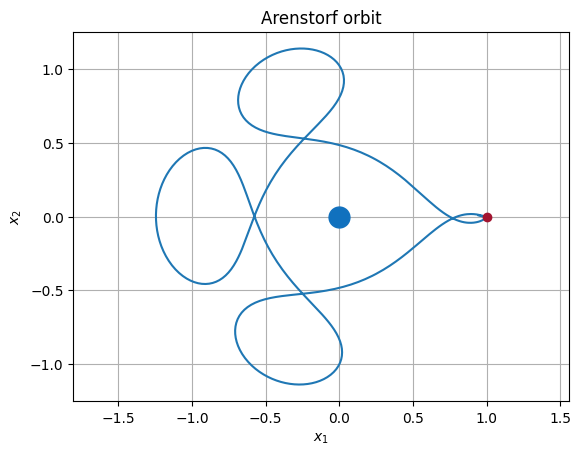

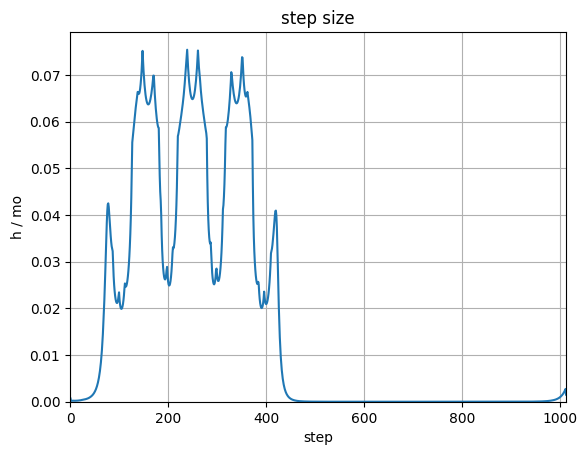

In [93]:
# plot result
h = np.diff(t)
n = len(h)
plt.plot(y[0,:], y[2,:],'-o', markersize=0)
plt.plot(0, 0, 'o', markersize=15, color=[0.0667,0.4431,0.7451]) 
plt.plot(1, 0, 'o', markersize=6, color=[0.6353,0.0784,0.1843]) 
plt.axis('equal')
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Arenstorf orbit')
plt.show()

# plot size of time steps
plt.plot(np.arange(1, n + 1), h)
plt.grid()
plt.xlabel('step')
plt.ylabel('h / mo')
plt.title('step size')
plt.xlim((0, n))
plt.ylim(bottom=0)
plt.show()